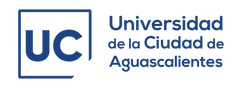

# **METODOS NUMERICOS II**

<font color=blue size=3>*Recuerda realizar una copia del archivo a tu drive*</font>

## <font color=green>Desviación Media Absoluta</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


## Conociendo la base de datos, exportar pandas

In [4]:
import pandas as pd

df = pd.read_csv("s02_base.csv")
df

,CodPostal,Sexo,Edad,Color,Años_Estudio,Renta,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


0 = Femenino

1 = Masculino

In [20]:
# los [[]] lo convierte en un dataframe si solo tiene un par se convierte en una lista
tail_edad = df[["Edad"]].tail(10)
tail_edad

,Edad
76830,62
76831,44
76832,49
76833,30
76834,35
76835,46
76836,30
76837,32
76838,57
76839,38


In [21]:
edad_media = tail_edad.mean()[0]
print(f"edad media: {edad_media}")

tail_edad["Desviacion"] = tail_edad["Edad"] - edad_media
tail_edad

edad media: 42.3


,Edad,Desviacion
76830,62,19.7
76831,44,1.7
76832,49,6.7
76833,30,-12.3
76834,35,-7.3
76835,46,3.7
76836,30,-12.3
76837,32,-10.3
76838,57,14.7
76839,38,-4.3


In [22]:
tail_edad = tail_edad.reset_index()
tail_edad

,index,Edad,Desviacion
0,76830,62,19.7
1,76831,44,1.7
2,76832,49,6.7
3,76833,30,-12.3
4,76834,35,-7.3
5,76835,46,3.7
6,76836,30,-12.3
7,76837,32,-10.3
8,76838,57,14.7
9,76839,38,-4.3


10


<AxesSubplot: >

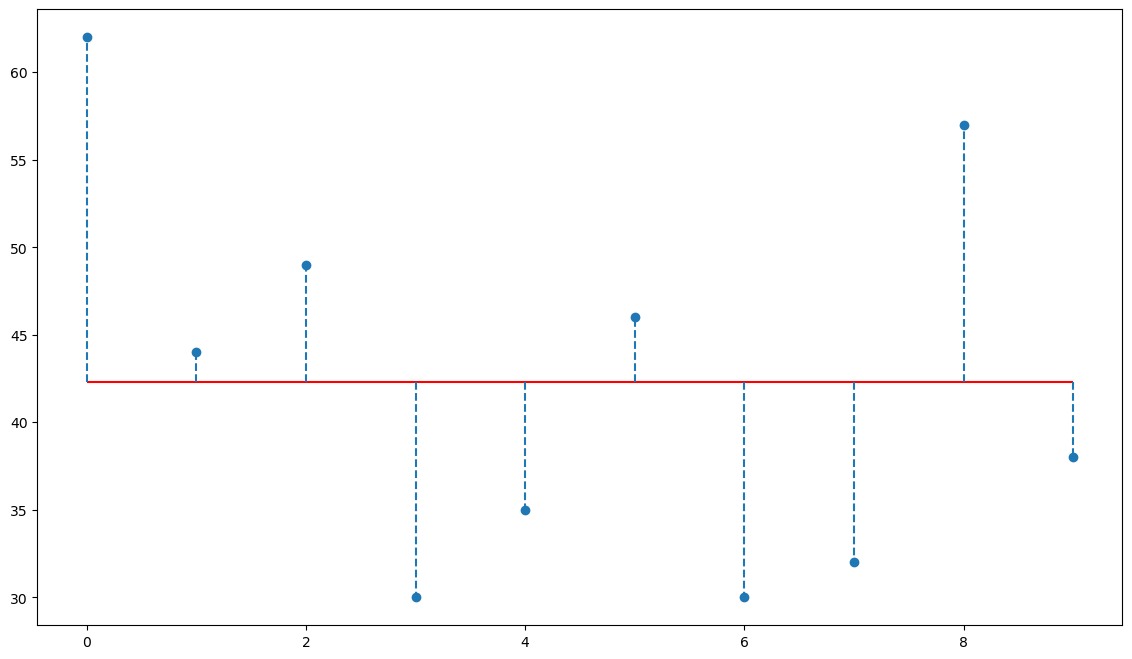

In [36]:
#import matplotlib.pyplot as plt
ax = tail_edad["Edad"].plot(style="o")
ax.figure.set_size_inches(14,8)
ax.hlines(y = edad_media, 
          xmin=0, 
          xmax= tail_edad.shape[0] -1, 
        colors = "red")


print(tail_edad.shape[0]) # cuantos elementos tiene (10, graficar hline de 0 a 9 en x)

for i in range(tail_edad.shape[0]):
    ax.vlines(x = i, 
              ymin = edad_media,
              ymax = tail_edad["Edad"][i],
              linestyles= "dashed"
             )
    
ax

In [37]:
tail_edad["Desviacion"].abs().mean()

9.3

In [38]:
tail_edad["Edad"].mad()

/tmp/ipykernel_27940/164552191.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  tail_edad["Edad"].mad()


9.3

## <font color=green>Varianza</font>
***

La varianza se construye a partir de las diferencias entre cada observación y la media de los datos, es decir, la desviación alrededor de la media. Al calcular la varianza, las desviaciones alrededor de la media se elevan al cuadrado.

### Varianza formula

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [44]:
tail_edad = tail_edad[["Edad", "Desviacion"]]
tail_edad

,Edad,Desviacion
0,62,19.7
1,44,1.7
2,49,6.7
3,30,-12.3
4,35,-7.3
5,46,3.7
6,30,-12.3
7,32,-10.3
8,57,14.7
9,38,-4.3


In [46]:
#tail_edad["Desviacion^2"] = tail_edad["Desviacion"]**2
tail_edad["Desviacion^2"] = tail_edad["Desviacion"].pow(2)
tail_edad

,Edad,Desviacion,Desviacion^2
0,62,19.7,388.09
1,44,1.7,2.89
2,49,6.7,44.89
3,30,-12.3,151.29
4,35,-7.3,53.29
5,46,3.7,13.69
6,30,-12.3,151.29
7,32,-10.3,106.09
8,57,14.7,216.09
9,38,-4.3,18.49


In [48]:
varianza = tail_edad["Desviacion^2"].sum() /(len(tail_edad) -1)
varianza

127.34444444444446

In [51]:
print(f"Varianza: {tail_edad['Edad'].var()}")

Varianza: 127.34444444444446


## <font color=green>Desviación estandar</font>
***

Una de las limitaciones de la varianza es que proporciona medidas en cuadrados de las unidades originales; la varianza de las medidas de longitud, por ejemplo, está en unidades de área. Por tanto, el hecho de que las unidades sean diferentes dificulta la comparación de la dispersión con las variables que la definen. Una forma de eliminar esta dificultad es considerar su raíz cuadrada.

### Desviación estandar muestral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

**Import numpy**

In [52]:
import numpy as np

In [53]:
desv_estand = np.sqrt(varianza)
desv_estand

11.284699572626844

In [54]:
tail_edad["Edad"].std()

11.284699572626844